In [45]:
import pandas as pd
import json
from datetime import datetime, timedelta, date
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)

# Read the cleaned data and begin exploratory analysis

In [46]:
records = pd.read_csv('cleaned_player_inj_updated.csv')
#records = records.drop(columns = ['index'])
cols = ["formatteddate","FormattedInjuryDate","FormattedReturnDate","actualInjuryDate"]
for col in cols:
    records[col] = pd.to_datetime(records[col])
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5302 entries, 0 to 5301
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 5302 non-null   int64         
 1   acute                 5302 non-null   float64       
 2   acwr                  5302 non-null   float64       
 3   chronic               5302 non-null   float64       
 4   condition             5302 non-null   object        
 5   duration              5302 non-null   float64       
 6   load                  5302 non-null   float64       
 7   rpe                   5302 non-null   float64       
 8   type                  5302 non-null   object        
 9   player_id             5302 non-null   object        
 10  name                  5293 non-null   object        
 11  formatteddate         5302 non-null   datetime64[ns]
 12  Activity              37 non-null     object        
 13  Classification    

5f014aa4b8bec1cf08f7ca0f


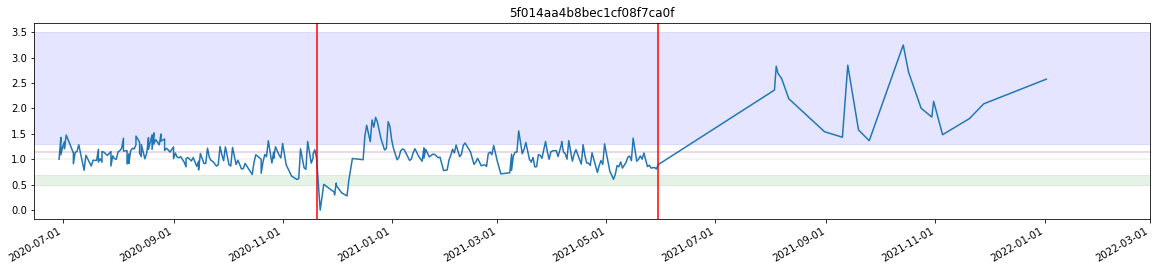

5f0593f1c37cc79a7d6a6caf


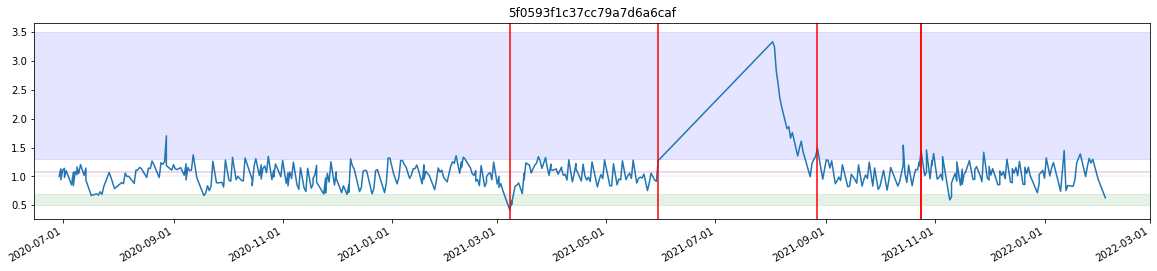

60f25487854df5b9da1bac55


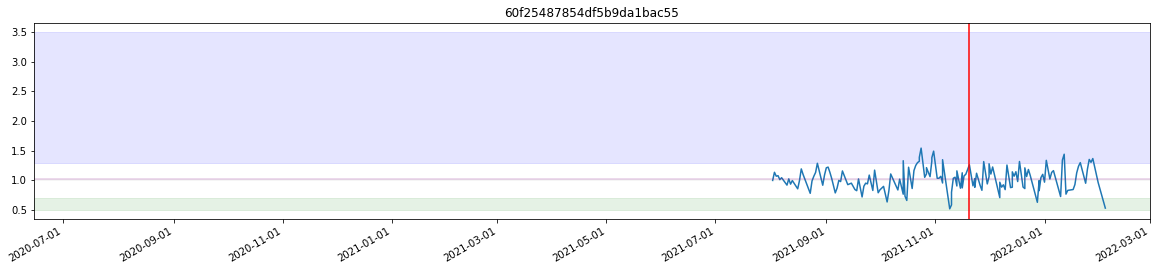

5f05939a239906121f930930


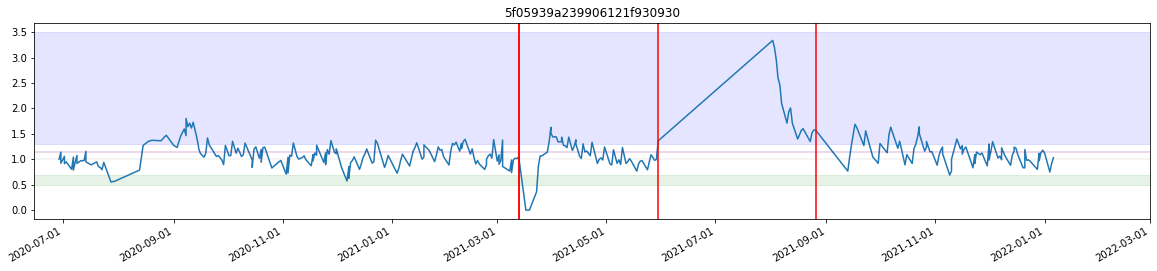

5f059355c37cc79a7d6a6caa


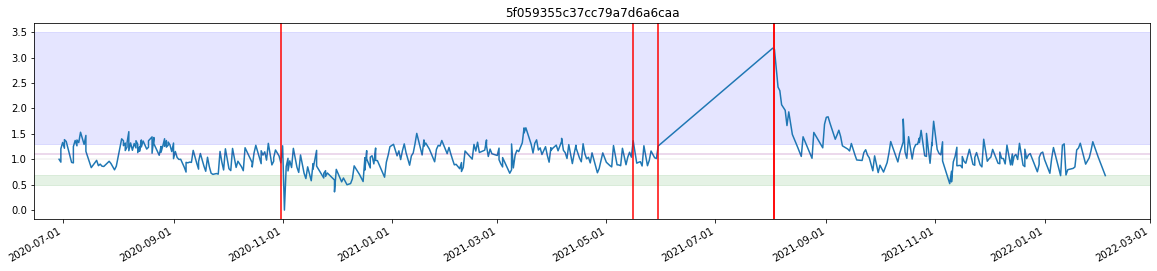

60f254d8a1b3ec106cc401da


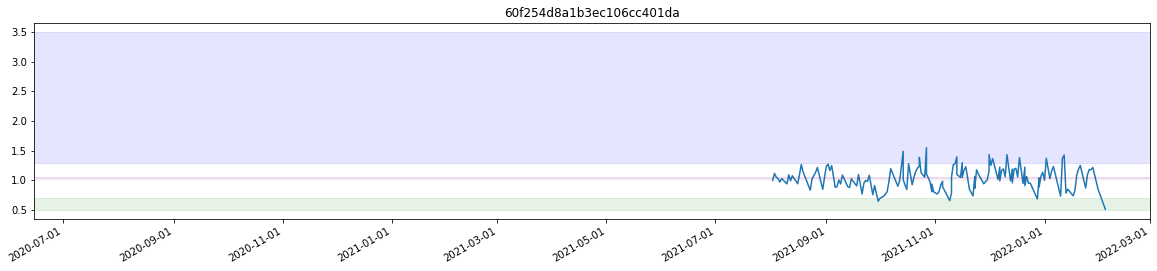

5f0593d9c37cc79a7d6a6cae


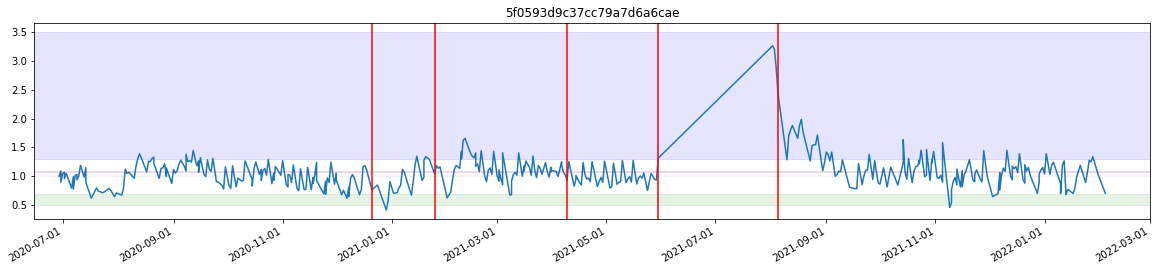

60f253c0854df5b9da1bac54


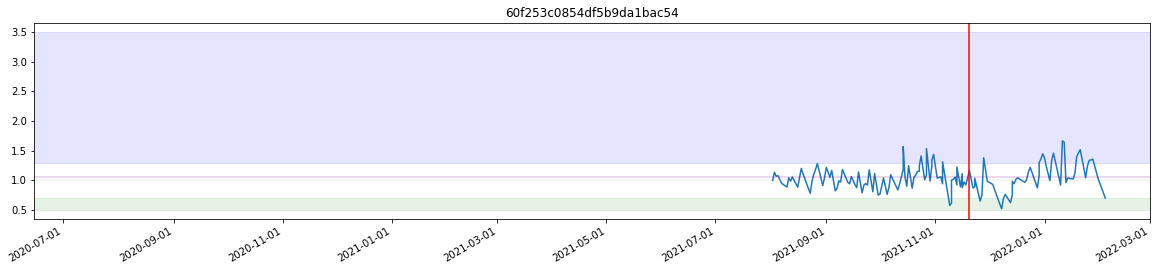

5f059378239906121f93092e


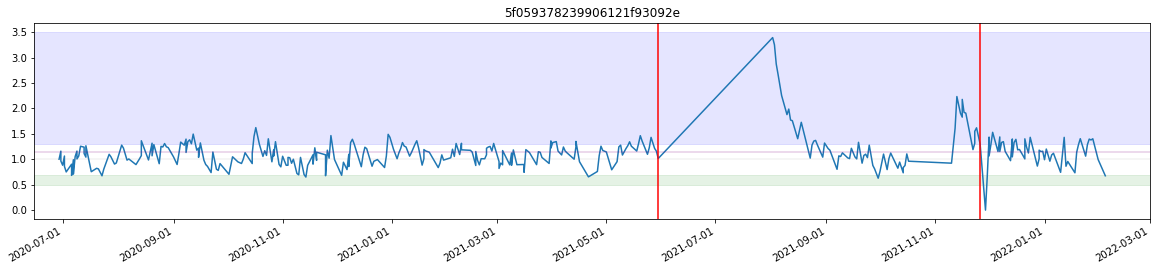

5f86fa4805bc5268fb4a00a5


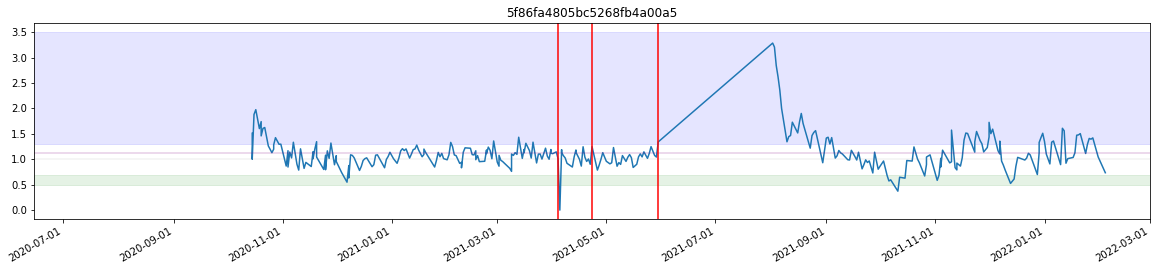

6107d0a36f7b01ca9c0f6571


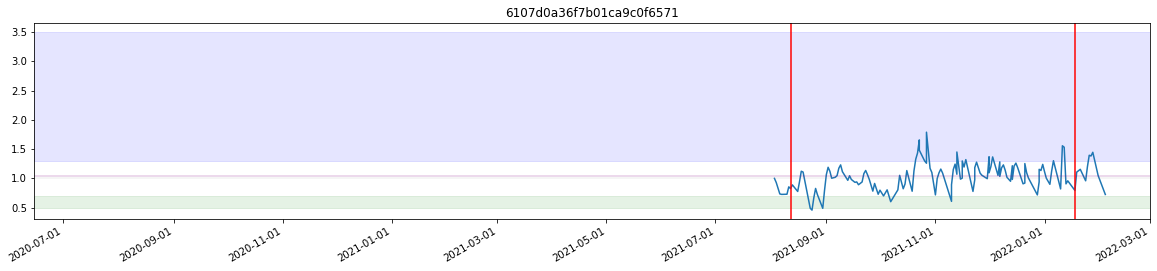

61162b72840a022569af263d


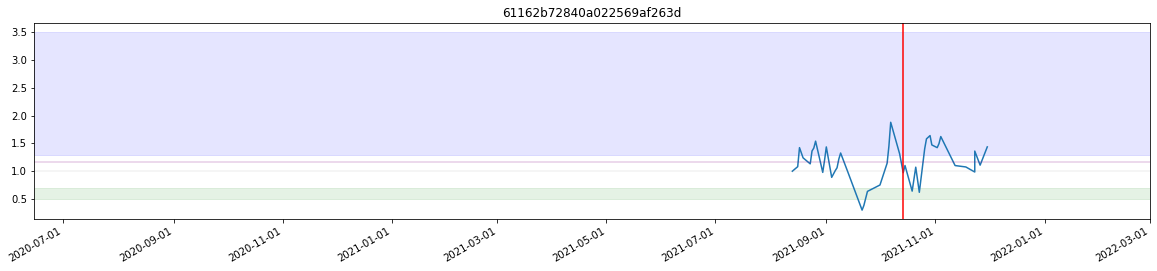

5f059388239906121f93092f


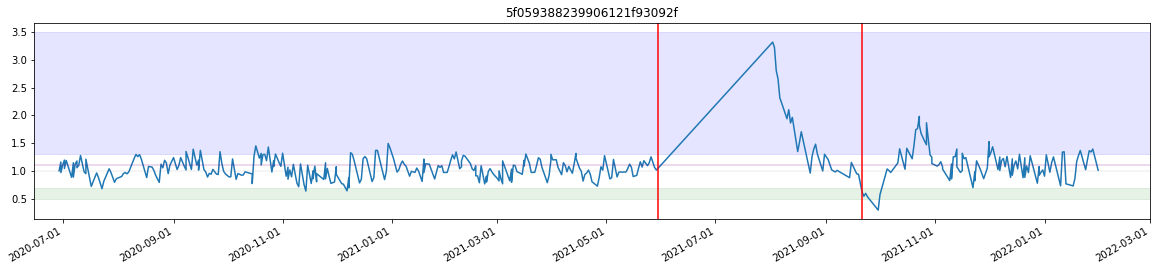

6153f4f14983cc4b427f2af2


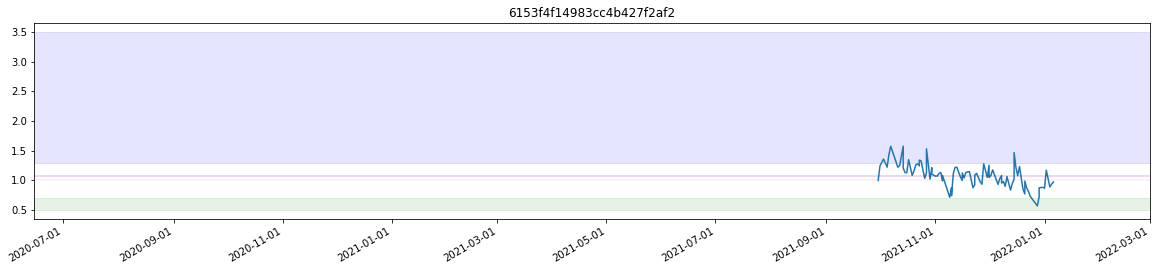

5f0592cc239906121f930928


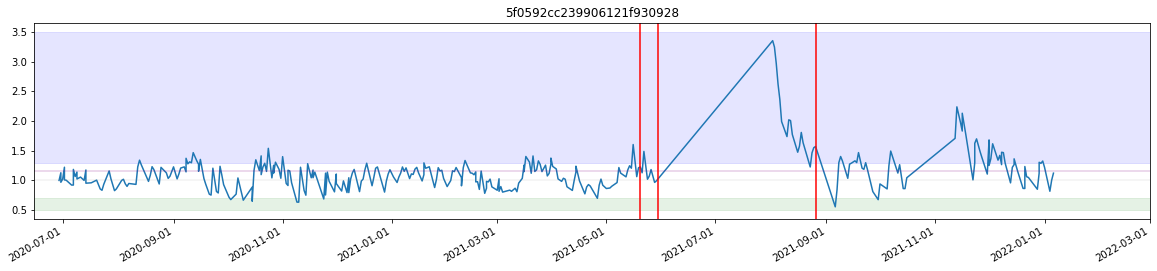

5f0592e2239906121f930929


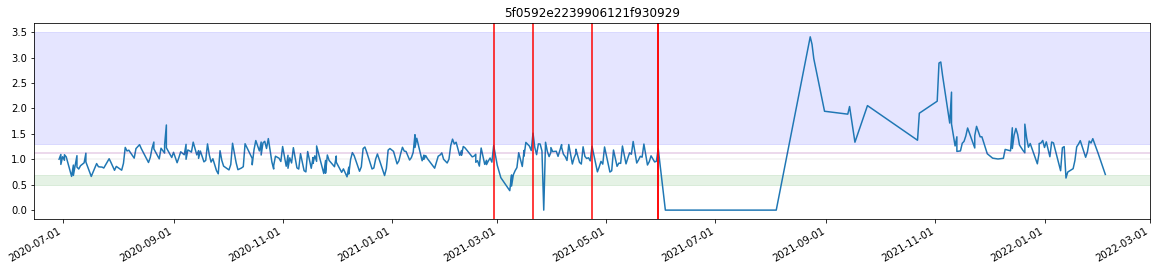

60f254ada1b3ec106cc401d9


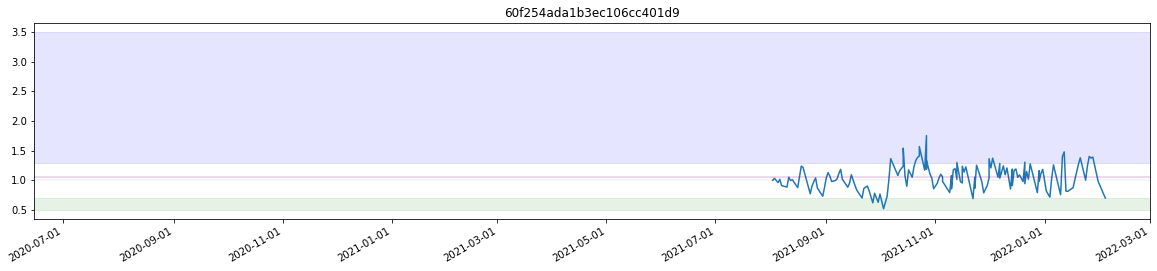

61139a2f859c5efc737749ba


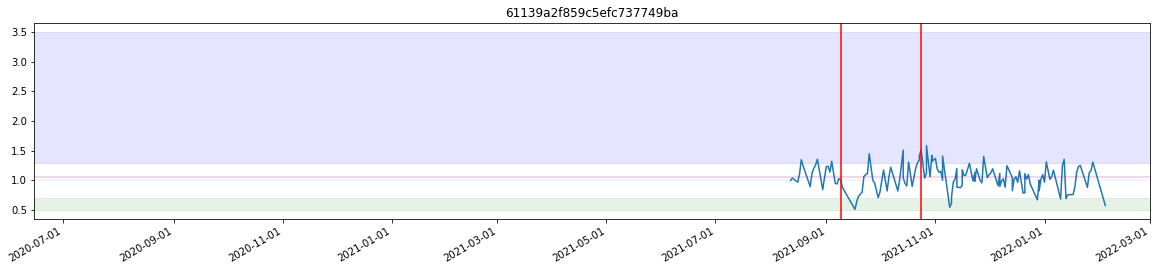

611a41e057d5db652811c0f3


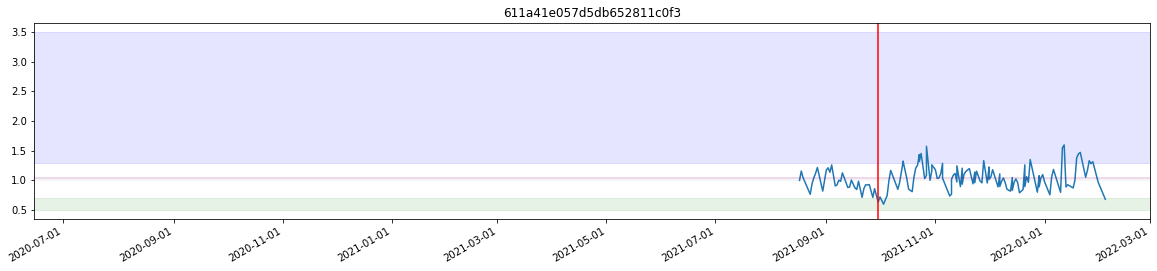

5f059326c37cc79a7d6a6ca9


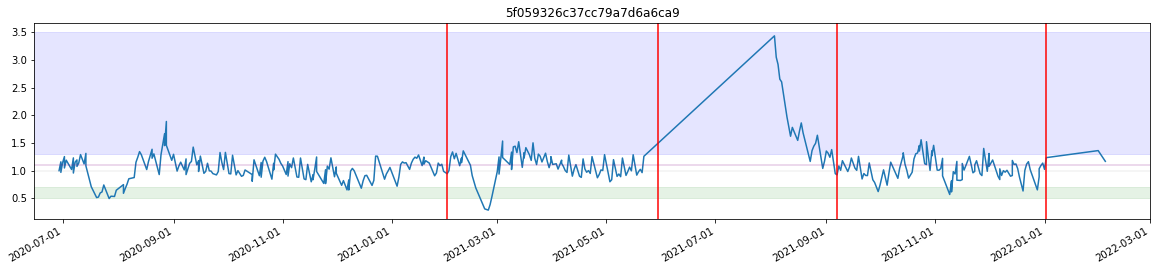

60f254fb854df5b9da1bac56


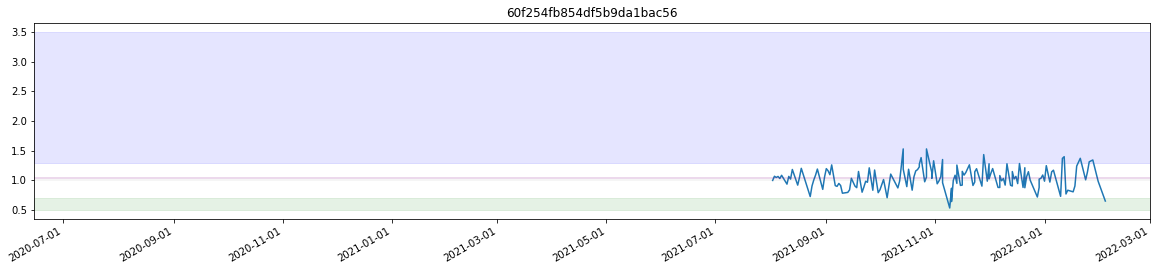

In [47]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

# acwr vs date
for pid in set(records['player_id']):
    print(pid)
    records_1 = records[records['player_id'] == pid] 
    
    plt.figure(figsize=(20, 4))
    plt.plot(records_1['formatteddate'],records_1['acwr'])
    
    dtFmt = mdates.DateFormatter('%Y-%m-%d') # define the formatting
    plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis
    #plt.show()
    
    plt.title(pid)
    plt.axhline(1, color='grey', alpha=0.1)
    plt.axhline(records_1['acwr'].mean(), color='purple', alpha=0.2)
    plt.axhspan(1.3, 3.5, color='blue', alpha=0.1)
    plt.axhspan(0.5, 0.7, color='green', alpha=0.1)
    for i in records_1['actualInjuryDate']:
        try:
            plt.axvline(i, color='red')
        except:
            plt.axvline(0,alpha=0)
            
    plt.gcf().autofmt_xdate()
    plt.gca().set_xlim([date(2020, 6, 15), date(2022, 3, 1)])
    plt.show()

In [50]:
def exposure_hist(category, col):
    for tp in set(records[category]):
        print(tp)
        records_1 = records[records[category] == tp] 
    
        plt.figure(figsize=(15, 4))
        plt.hist(records_1[col], bins = 20, color = 'grey')
        plt.title(tp)
        plt.show()

Quarantine - Run


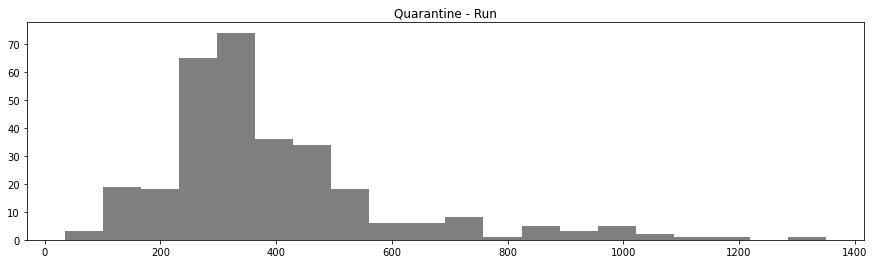

Quarantine - Gym


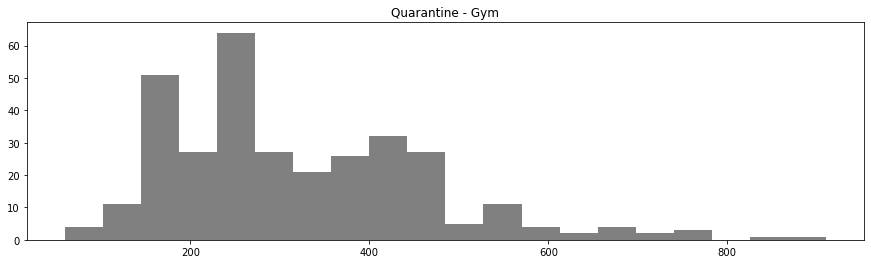

None


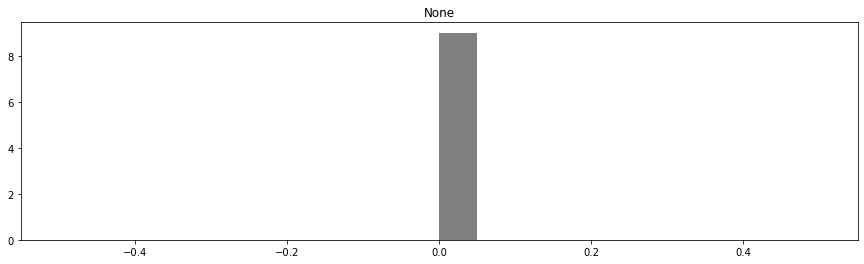

Hike


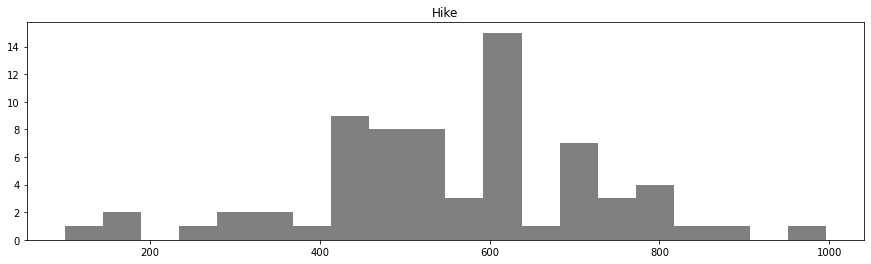

Practice (Field)


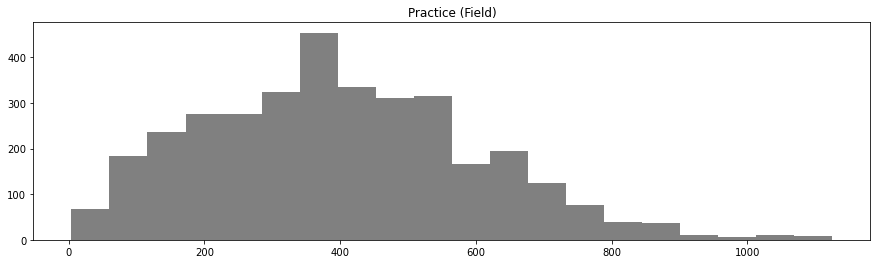

Game


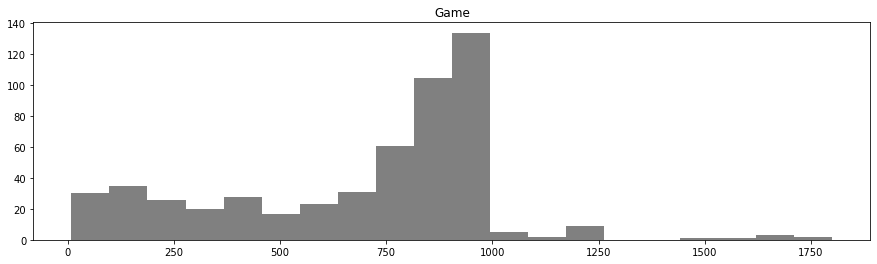

Rehab


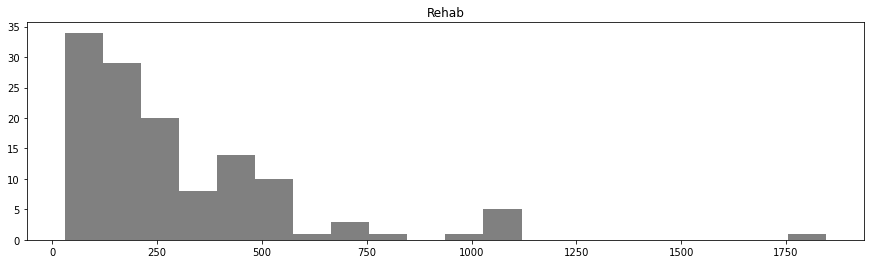

Modified


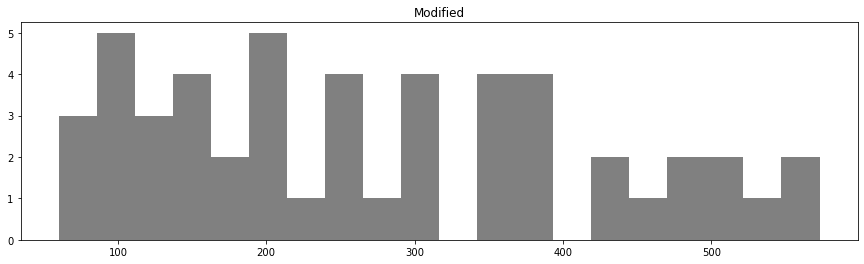

Practice (Beach)


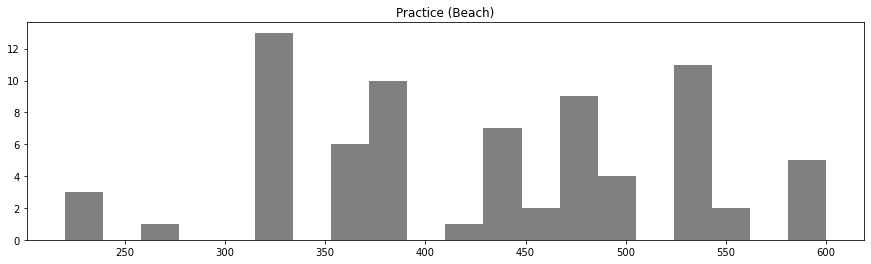

Practice (Gym)


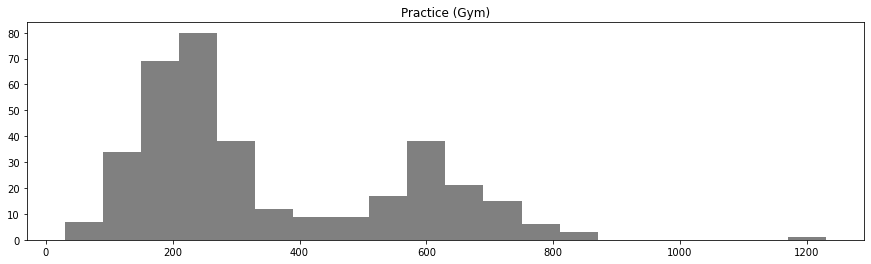

In [51]:
exposure_hist('type','load')

Quarantine - Run


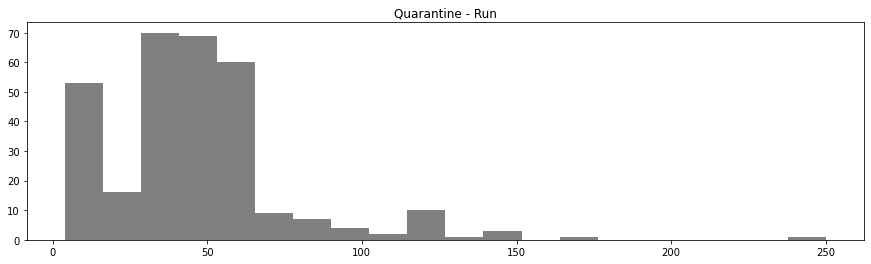

Quarantine - Gym


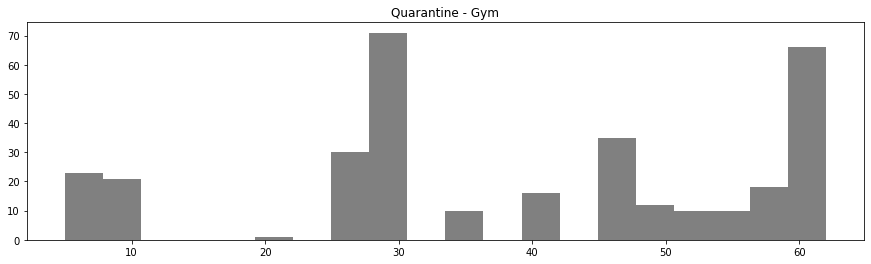

None


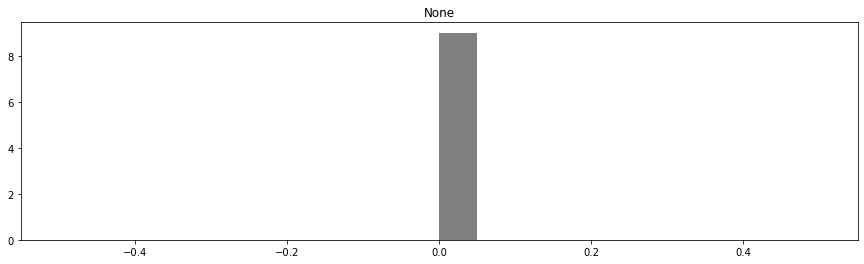

Hike


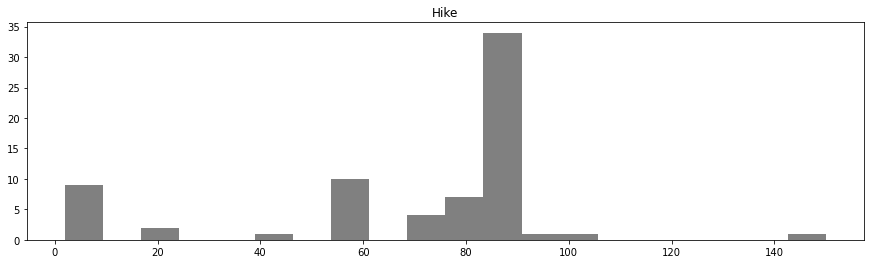

Practice (Field)


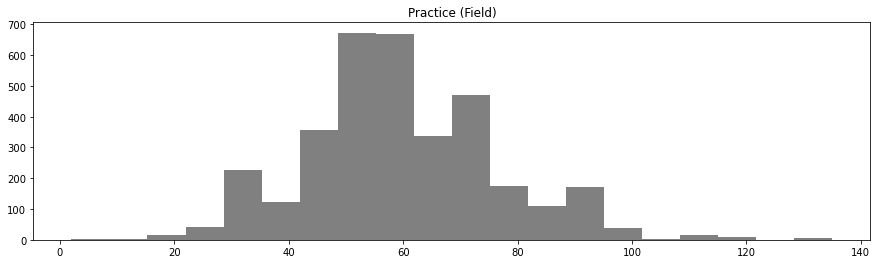

Game


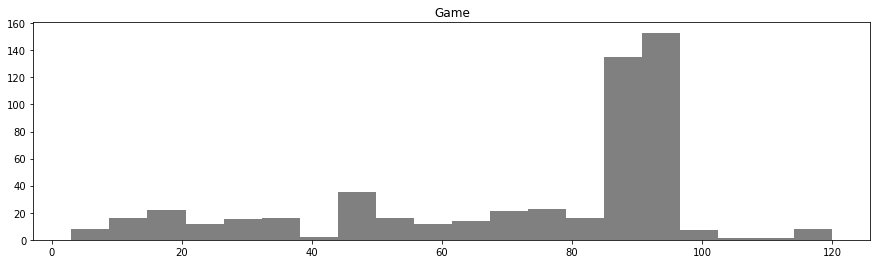

Rehab


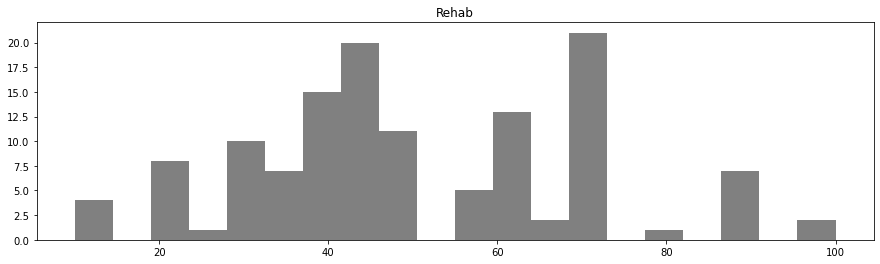

Modified


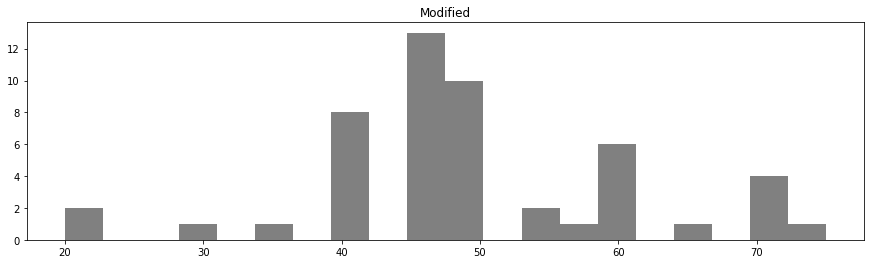

Practice (Beach)


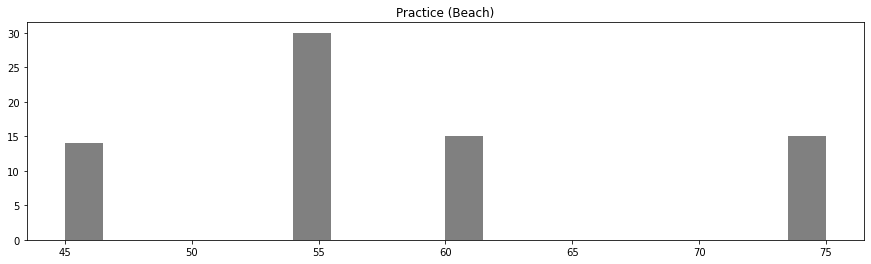

Practice (Gym)


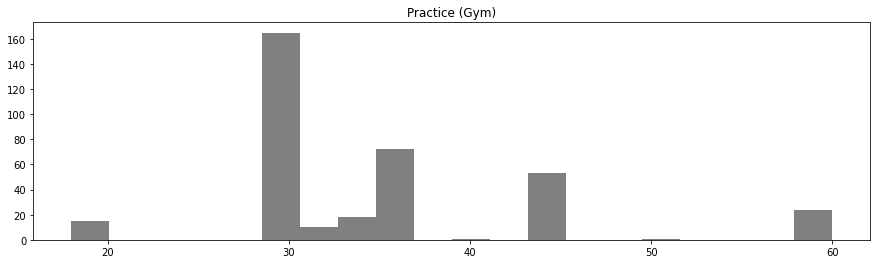

In [52]:
exposure_hist('type','duration')

In [53]:
def label_type(row):
    train_types = ['Practice (Gym)', 'Practice (Field)', 'Quarantine - Gym', 'Quarantine - Run', 'Hike']
    rehab_types = ['Rehab', 'Modified']
    if row["type"] in train_types:
        return 'Practice'
    elif row["type"] in rehab_types:
        return 'Rehab'
    else:
        return 'Game'


In [54]:
records['generalizedType'] = records.apply(lambda row: label_type(row), axis = 1)

Rehab


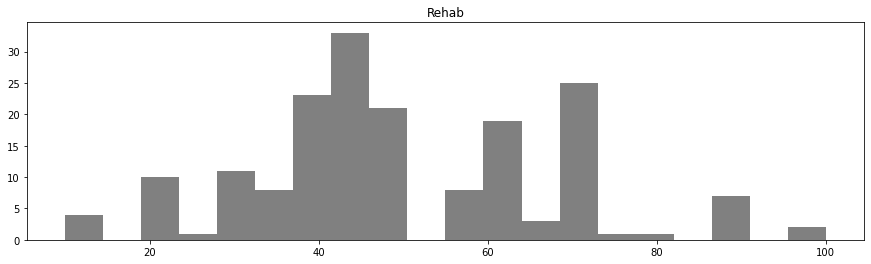

Game


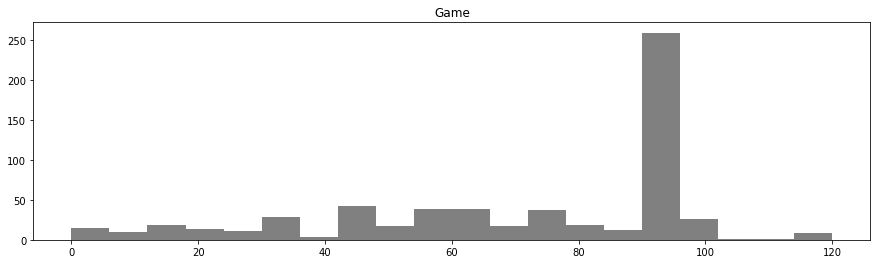

Practice


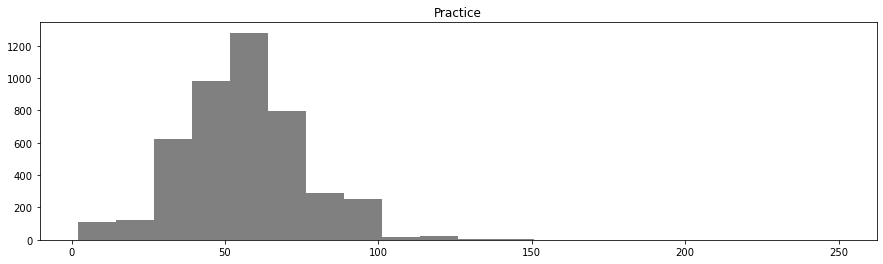

In [55]:
exposure_hist('generalizedType','duration')

Rehab


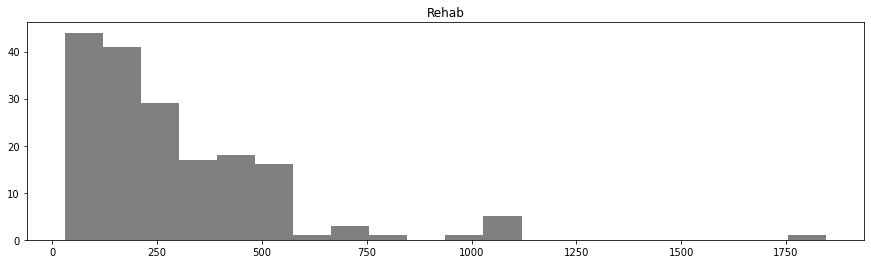

Game


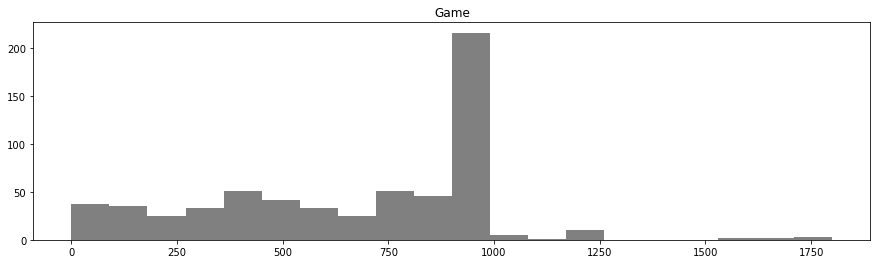

Practice


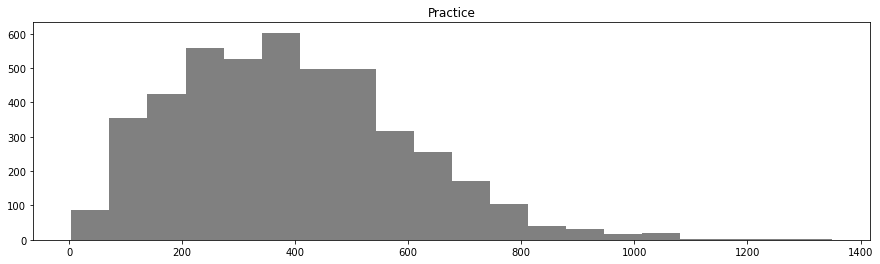

In [56]:
exposure_hist('generalizedType','load')

In [57]:
records.head()

,index,acute,acwr,chronic,condition,duration,load,rpe,type,player_id,name,formatteddate,Activity,Classification,Location,OSIICs,Onset,Past Injury,Reoccurance,Side,Surgery,FormattedInjuryDate,FormattedReturnDate,injury?,NeedActualInjuryDate,daydiff,actualInjuryDate,generalizedType
0,4,390.000000,1.000000,390.000000,Artificial (Dry),65.0,390.0,6.0,Practice (Field),5f059378239906121f93092e,Xavi Cheng,2020-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,0,False,18442.0,NaT,Practice
1,10,481.250000,1.159157,415.172414,Grass (Dry),55.0,755.0,8.0,Practice (Field),5f059378239906121f93092e,Xavi Cheng,2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,0,False,18443.0,NaT,Practice
2,18,371.250000,0.964718,384.827586,Gym/Indoors,45.0,315.0,7.0,Practice (Gym),5f059378239906121f93092e,Xavi Cheng,2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,0,False,18443.0,NaT,Practice
3,34,328.437500,0.882705,372.080856,Artificial (Dry),40.0,200.0,5.0,Modified,5f059378239906121f93092e,Xavi Cheng,2020-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,0,False,18444.0,NaT,Rehab
4,40,418.828125,1.062999,394.006314,Artificial (Dry),60.0,690.0,7.0,Practice (Field),5f059378239906121f93092e,Xavi Cheng,2020-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,0,False,18445.0,NaT,Practice


In [58]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5302 entries, 0 to 5301
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 5302 non-null   int64         
 1   acute                 5302 non-null   float64       
 2   acwr                  5302 non-null   float64       
 3   chronic               5302 non-null   float64       
 4   condition             5302 non-null   object        
 5   duration              5302 non-null   float64       
 6   load                  5302 non-null   float64       
 7   rpe                   5302 non-null   float64       
 8   type                  5302 non-null   object        
 9   player_id             5302 non-null   object        
 10  name                  5293 non-null   object        
 11  formatteddate         5302 non-null   datetime64[ns]
 12  Activity              37 non-null     object        
 13  Classification    

Out of 21 players, 10 are injured.

In [59]:
print(len(set(records['player_id'])))
print(len(set(records[records['injury?']==1]['player_id'])))

21
17


In [60]:
def posix_time(dt):
    return ((dt - datetime(2020, 6, 29)) / timedelta(seconds=1))/(24*60*60)

In [61]:
cols = ["formatteddate","FormattedInjuryDate","FormattedReturnDate","actualInjuryDate"]
for col in cols:
    records[col] = pd.to_datetime(records[col])

records['daydiff'] = records['actualInjuryDate'].apply(lambda x: posix_time(x))
records['log_daydiff'] = np.log(records['daydiff'])

In [62]:
injury_records = records[records['injury?']==1]
injury_records.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 299 to 5084
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 38 non-null     int64         
 1   acute                 38 non-null     float64       
 2   acwr                  38 non-null     float64       
 3   chronic               38 non-null     float64       
 4   condition             38 non-null     object        
 5   duration              38 non-null     float64       
 6   load                  38 non-null     float64       
 7   rpe                   38 non-null     float64       
 8   type                  38 non-null     object        
 9   player_id             38 non-null     object        
 10  name                  29 non-null     object        
 11  formatteddate         38 non-null     datetime64[ns]
 12  Activity              37 non-null     object        
 13  Classification    

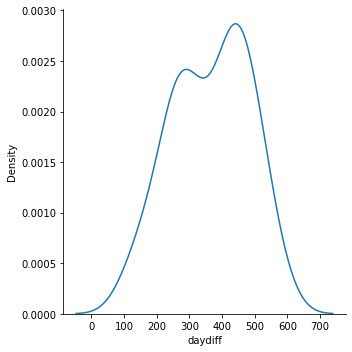

In [63]:
sns.displot(injury_records, x="daydiff", kind="kde")

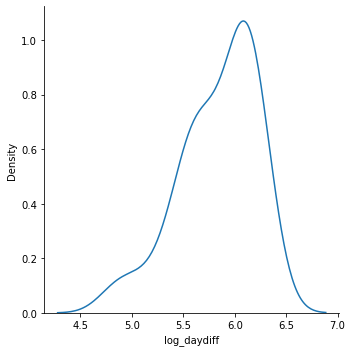

In [64]:
sns.displot(injury_records, x="log_daydiff", kind="kde")

In [65]:
injury_records.skew(axis = 0, skipna = True)

index                   0.275728
acute                   0.223460
acwr                    0.910128
chronic                -0.299964
duration               -0.149582
load                    0.418343
rpe                    -0.183359
injury?                 0.000000
NeedActualInjuryDate    0.448612
daydiff                -0.233464
log_daydiff            -0.918135
dtype: float64

In [66]:
records.to_csv('cleaned_player_inj_updated.csv', header = True, index= False)